<a href="https://colab.research.google.com/github/ItsMacto/FirstMLModel/blob/main/FirstMLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Project: Students Performance Analysis**

This notebook walks through a machine learning project using the Students Performance Dataset from Kaggle. This is my first independent project, utilizing methods learned from Chapter 3 of my book. The goal is to explore the dataset, perform necessary preprocessing, and apply machine learning techniques to analyze student performance.

**Dataset Source:** [Students Performance Dataset on Kaggle](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data)

## Download the data

We will load the Students Performance dataset from a local CSV file. Ensure the CSV file is in the working directory.

In [802]:
from pathlib import Path
import pandas as pd
import numpy as np
import tarfile
import urllib.request

def loadData():
  # for now getting file may add download with api token later
  return pd.read_csv('StudentsPerformance.csv')

studentsPerformance = loadData()


## Explore Data
We will inspect the first few rows of the dataset, check for missing values, and convert relevant columns to appropriate data types. Additionally, we will generate summary statistics and visualizations to understand the distribution of the data.

In [803]:
studentsPerformance.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [804]:
studentsPerformance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [805]:
print(studentsPerformance.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [806]:
# convert GradeClass to a int because it only has int values
studentsPerformance['GradeClass'] = studentsPerformance['GradeClass'].astype(np.int64)
studentsPerformance.info()
studentsPerformance.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 280.4 KB


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


In [807]:
studentsPerformance.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


## Visualize Data
We will create histograms to visualize the distribution of numerical features like Age, StudyTimeWeekly, and Absences. This helps in understanding the data distribution and identifying any outliers.

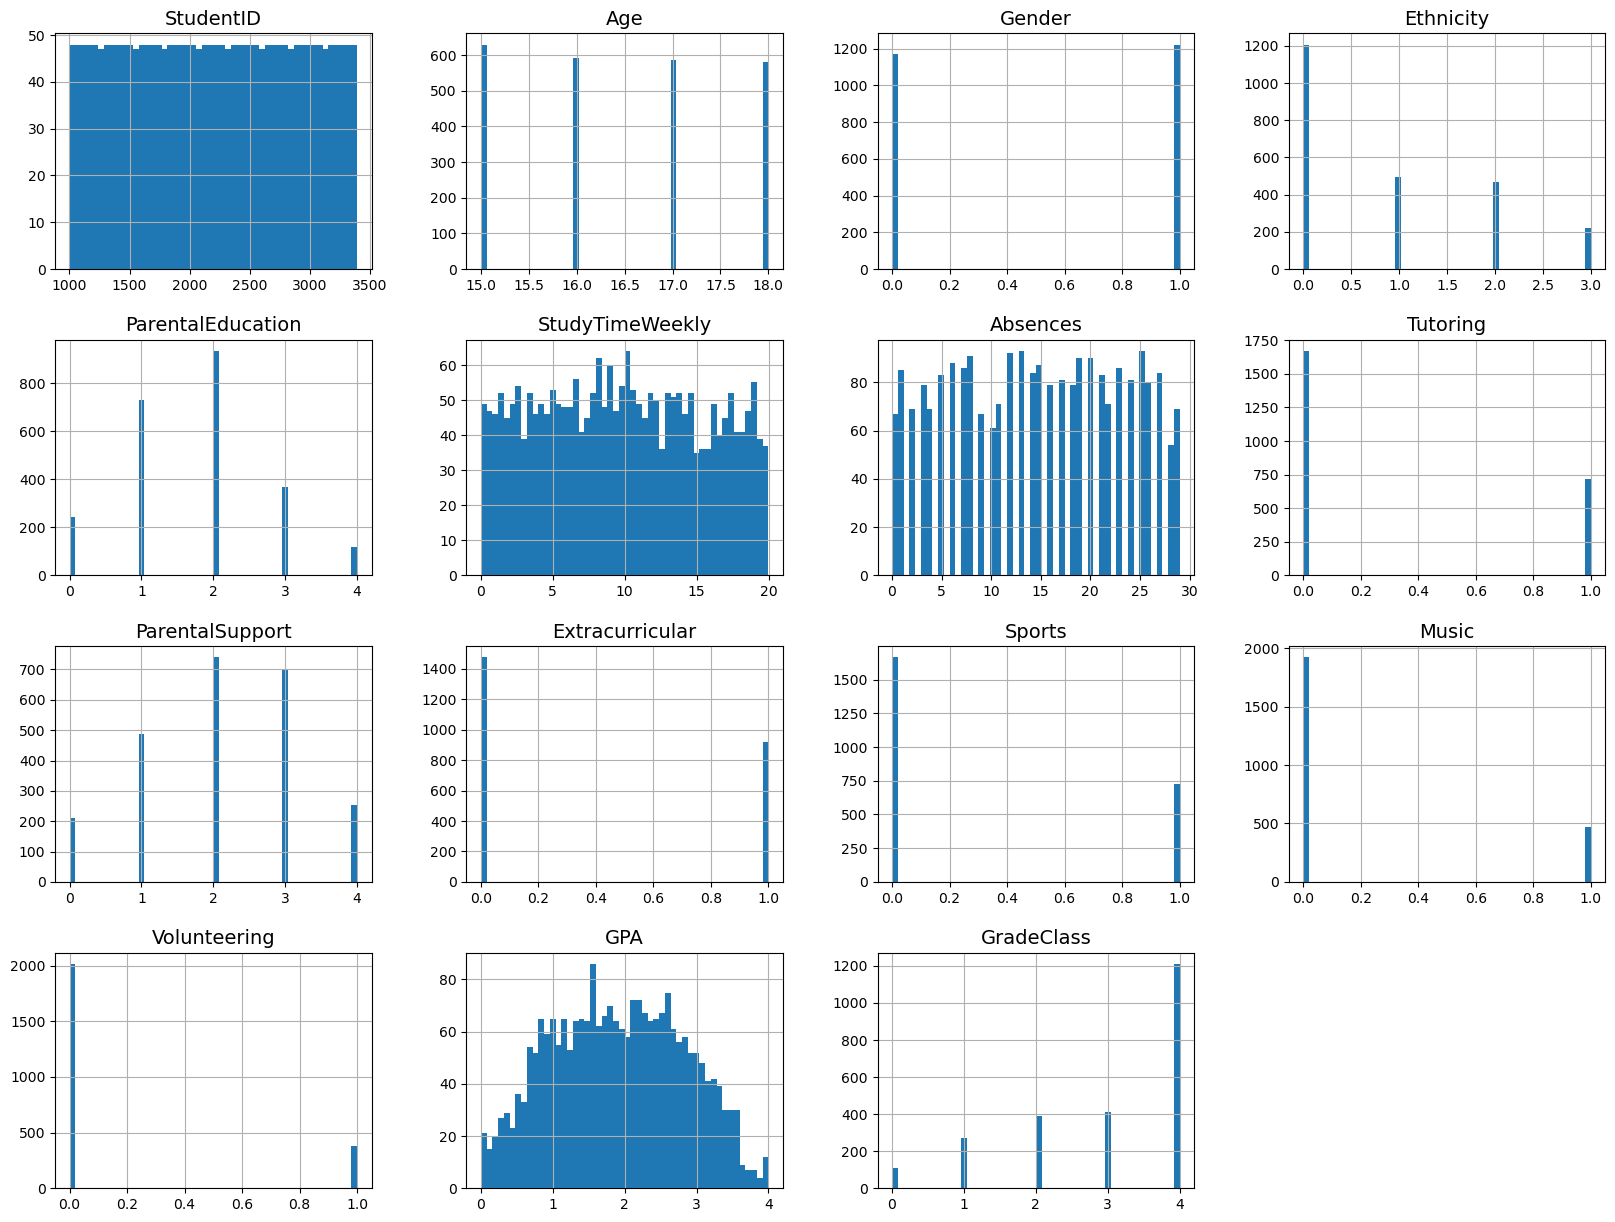

In [808]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

studentsPerformance.hist(bins=50, figsize=(20,15))
plt.show()

## **Step 4: Split Data**

We will split the data into training and testing sets. First, we'll use a random shuffle method to create these sets, and then we'll use stratified sampling to ensure that the proportions of the 'GradeClass' feature are consistent across the splits. This helps in creating a representative sample for training and evaluation.

In [809]:
np.random.seed(42)

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

trainSet, testSet = shuffle_and_split_data(studentsPerformance, 0.2)

print(len(trainSet), len(testSet), len(studentsPerformance))

1914 478 2392


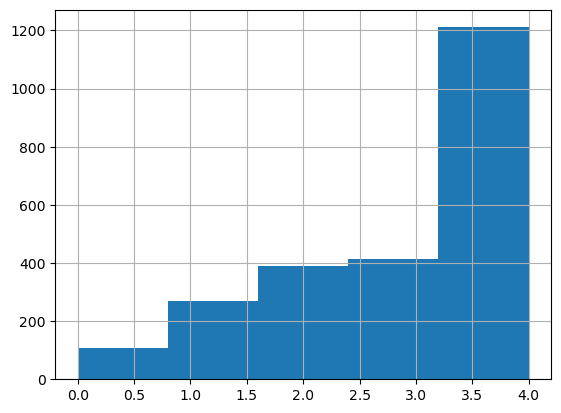

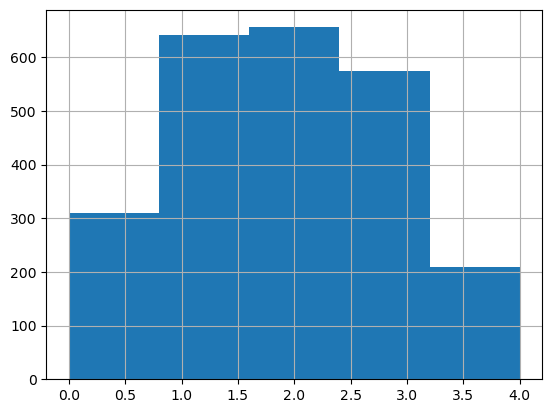

In [810]:
studentsPerformance['GradeClass'].hist(bins=5)
plt.show()
studentsPerformance['GPA'].hist(bins=5)
plt.show()


In [811]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
    studentsPerformance, test_size=0.2, stratify=studentsPerformance["GradeClass"], random_state=42)

In [812]:
def GradeClassProportions(data):
    return data["GradeClass"].value_counts() / len(data)

train_set, test_set = train_test_split(studentsPerformance, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": GradeClassProportions(studentsPerformance),
    "Stratified %": GradeClassProportions(strat_test_set),
    "Random %": GradeClassProportions(test_set),
}).sort_index()
compare_props.index.name = "GradeClass"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
GradeClass,,,,,
0,4.47,4.38,4.59,-1.99,2.67
1,11.25,11.27,10.23,0.25,-9.04
2,16.35,16.28,17.75,-0.38,8.56
3,17.31,17.33,17.95,0.12,3.73
4,50.63,50.73,49.48,0.20,-2.27


You can see that the stratified sampling set produces a training set that is more repersentive of the overall data

In [837]:
studentsPerformance = strat_train_set.copy()


## Feature Engineering
First we take a look at the corralation. Then using knowledge of that will engineer some new columns with hopes of capturing different relationships

We will create new features to enhance our model:
- **ParentalCombined**: Interaction term between ParentalEducation and ParentalSupport.
- **Activities**: Sum of participation in Extracurricular, Sports, Music, and Volunteering.
- **StudyTime_ParentalSupport**: Interaction term between StudyTimeWeekly and ParentalSupport.

In [864]:
corrMatrix = studentsPerformance.corr()
corrMatrix["GPA"].sort_values(ascending=False)

GPA                          1.000000
StudyTime_ParentalSupport    0.250492
ParentalSupport              0.207327
StudyTimeWeekly              0.187819
Tutoring                     0.151609
activities                   0.121608
Extracurricular              0.082131
Music                        0.069553
Sports                       0.067569
Ethnicity                    0.029078
Age                          0.013355
Volunteering                 0.013215
StudentID                   -0.009117
Gender                      -0.010410
ParentalEducation           -0.051487
ParentalCombined            -0.107917
GradeClass                  -0.784561
Absences                    -0.921027
Name: GPA, dtype: float64

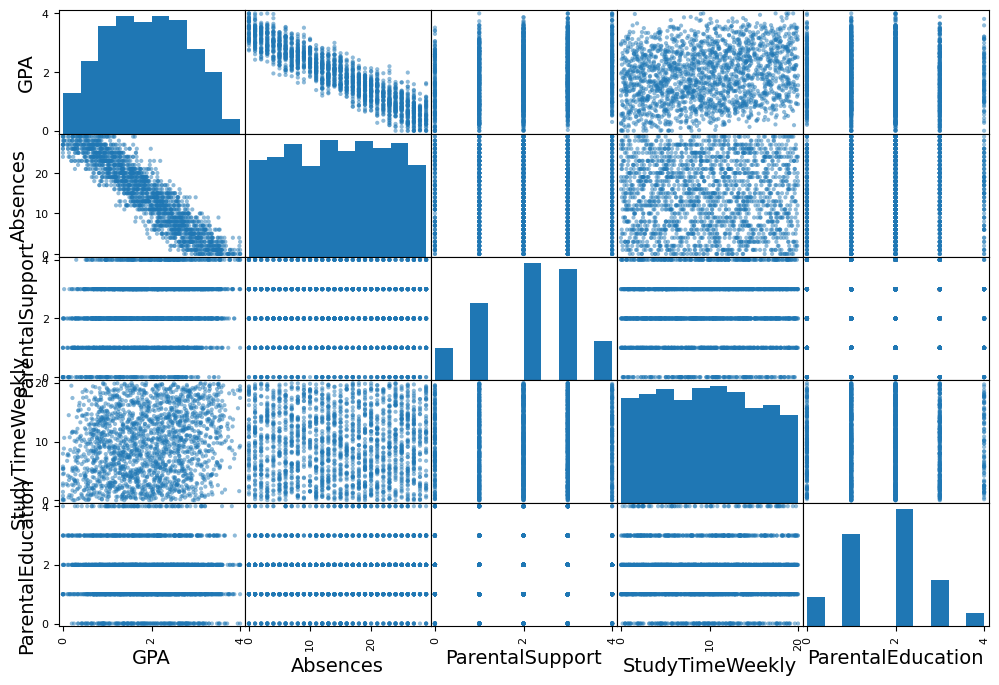

In [865]:
from pandas.plotting import scatter_matrix

attributes = [ "GPA", "Absences","ParentalSupport","StudyTimeWeekly","ParentalEducation"]
scatter_matrix(studentsPerformance[attributes], figsize=(12, 8))
plt.show()

In [884]:
studentsPerformance['ParentalCombined'] = (studentsPerformance['ParentalEducation'] + 1) * (studentsPerformance['ParentalSupport'] + 1)

studentsPerformance['activities'] = studentsPerformance['Extracurricular'] + studentsPerformance['Sports'] + studentsPerformance['Music'] + studentsPerformance['Volunteering']

studentsPerformance['StudyTime_ParentalSupport'] = studentsPerformance['StudyTimeWeekly'] * (studentsPerformance['ParentalSupport'])



In [885]:
corrMatrix = studentsPerformance.corr()
corrMatrix["GPA"].sort_values(ascending=False)


GPA                          1.000000
StudyTime_ParentalSupport    0.250492
ParentalSupport              0.207327
StudyTimeWeekly              0.187819
Tutoring                     0.151609
activities                   0.121608
Extracurricular              0.082131
ParentalCombined             0.072882
Music                        0.069553
Sports                       0.067569
Ethnicity                    0.029078
Age                          0.013355
Volunteering                 0.013215
StudentID                   -0.009117
Gender                      -0.010410
ParentalEducation           -0.051487
GradeClass                  -0.784561
Absences                    -0.921027
Name: GPA, dtype: float64

In [897]:
studentsPerformance = strat_train_set.drop(["GPA", 'GradeClass', "StudentID"], axis=1)
studentsPerformanceLabels = strat_train_set["GPA"].copy()

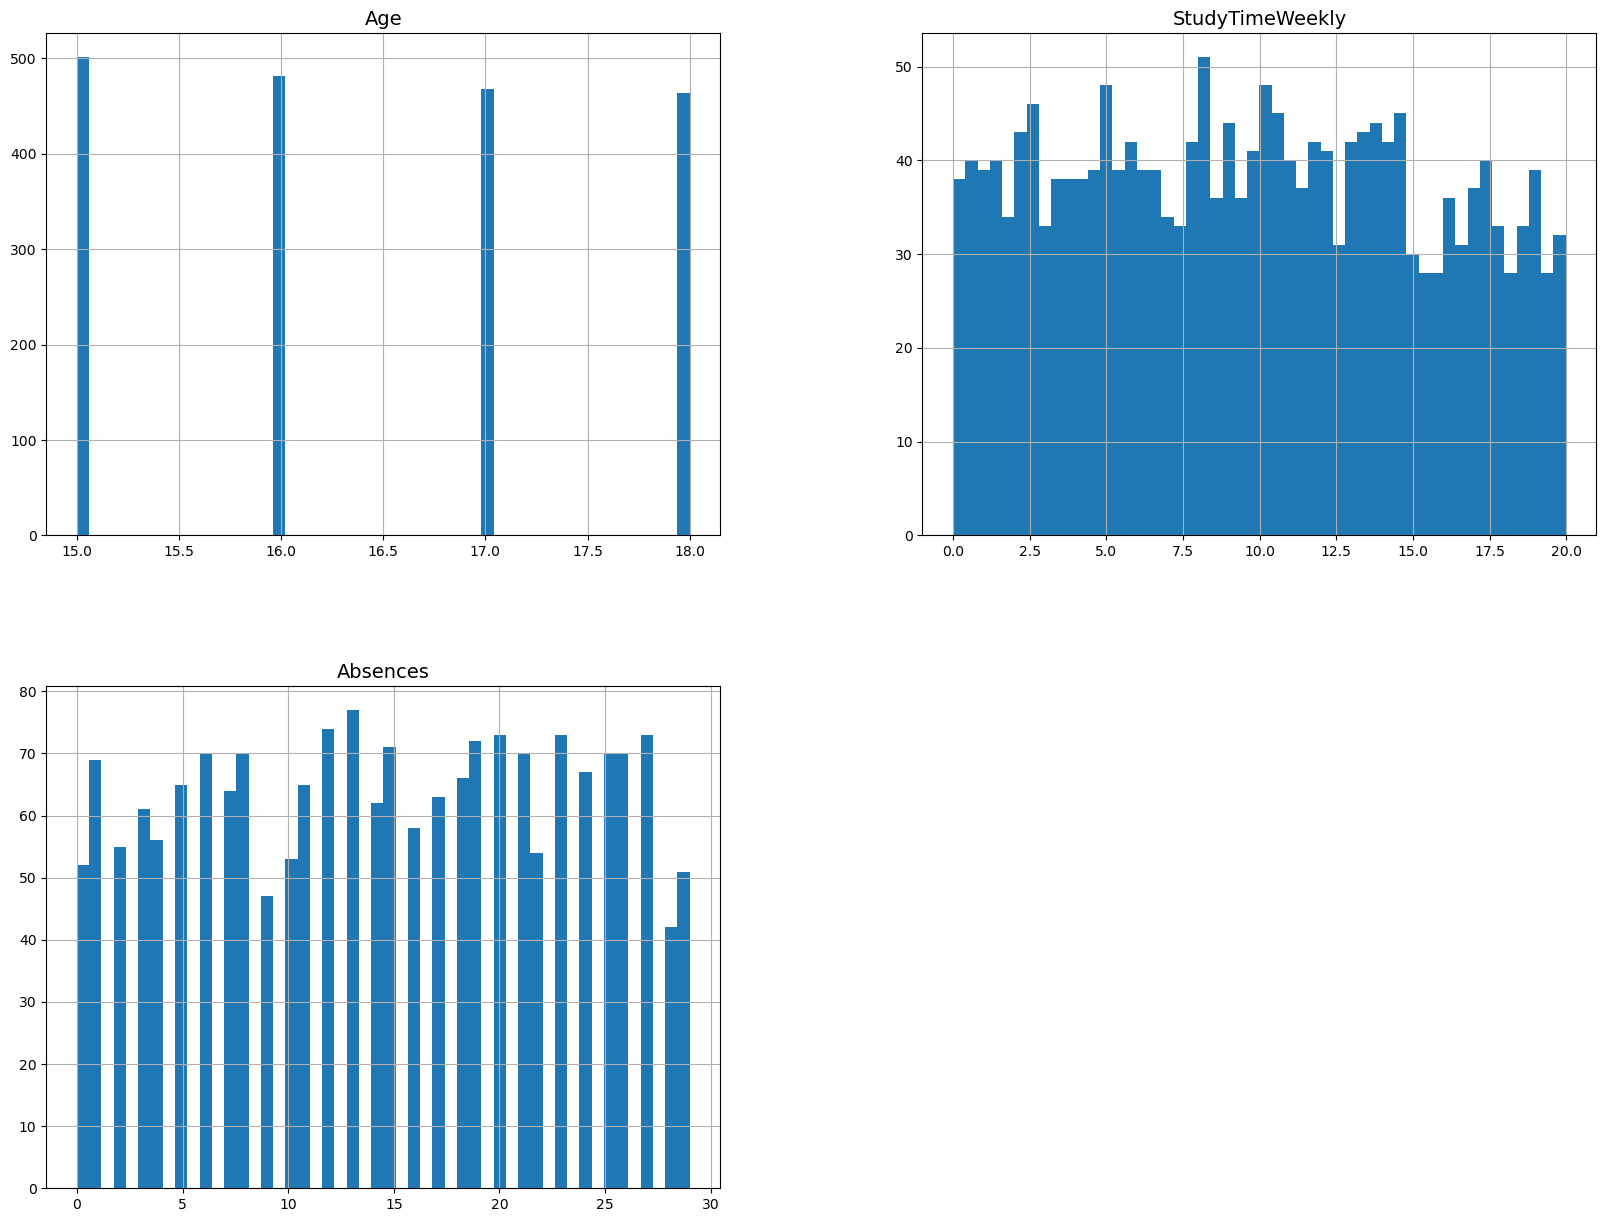

In [900]:
import numpy as np
import matplotlib.pyplot as plt


numeric_columns = studentsPerformance.get(['Age', 'StudyTimeWeekly', 'Absences'])

# Visualize distributions of numeric columns
numeric_columns.hist(bins=50, figsize=(20, 15))
plt.show()

Can see the data is uniformly distributed which we want

In [903]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

# Custom function to create ParentalCombined feature
# def ParentalEducation_ParentalSupport(X):
#     X = X.to_numpy()
#     return (X[:, 0:1] * -0.2) + X[:, 1:2]

# def activities(X):
#     X = X.to_numpy()
#     return (X[:, 0:1] + X[:, 1:2] + X[:, 2:3] + X[:, 3:4])

# def studytime_parentalsupport(X):
#     X = X.to_numpy()
#     return (X[:, 0:1] * X[:, 1:2])

def parentalEducation_ParentalSupport(X):
    X = X.to_numpy()
    return (X[:, 0:1] + 1) * (X[:, 1:2] + 1)

def activities(X):
    X = X.to_numpy()
    return (X[:, 0:1] + X[:, 1:2] + X[:, 2:3] + X[:, 3:4])

def studytime_parentalsupport(X):
    X = X.to_numpy()
    return (X[:, 0:1] * X[:, 1:2])


# Function to name the new feature
def combined_name(function_transformer, feature_names_in):
    return ["ParentalCombined"]

def activities_name(function_transformer, feature_names_in):
    return ["Activities"]

def studytime_parentalsupport_name(function_transformer, feature_names_in):
    return ["StudyTime_ParentalSupport"]


# Pipelines for custom features
combined_pipeline = make_pipeline(
    FunctionTransformer(parental_combined, feature_names_out=combined_name),
    StandardScaler()
)

activities_pipeline = make_pipeline(
    FunctionTransformer(activities, feature_names_out=activities_name)
)

studytime_parentalsupport_pipeline = make_pipeline(
    FunctionTransformer(studytime_parentalsupport, feature_names_out=studytime_parentalsupport_name),
    StandardScaler()
)

# Define columns
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences', 'ParentalEducation','ParentalSupport']
categorical_features = ['Ethnicity']
parental_features = ['ParentalEducation', 'ParentalSupport']
activities_features = ['Extracurricular', 'Sports', 'Music', 'Volunteering']
studytime_parentalsupport_features = ['StudyTimeWeekly', 'ParentalSupport']

# Define transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Create the column transformer
preprocessing = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('parental', combined_pipeline, parental_features),
        ('activities', activities_pipeline, activities_features),
        ('studytime_parentalsupport', studytime_parentalsupport_pipeline, studytime_parentalsupport_features)
    ],
    remainder='passthrough'  # Leave other columns as they are
)


studentsPerformanceLabels = strat_train_set["GPA"].copy()
# Fit and transform the training data
studentsPerformancePrep = preprocessing.fit_transform(studentsPerformance)


print(studentsPerformancePrep.shape)
print(preprocessing.get_feature_names_out())



(1913, 14)
['num__Age' 'num__StudyTimeWeekly' 'num__Absences'
 'num__ParentalEducation' 'num__ParentalSupport' 'cat__Ethnicity_0'
 'cat__Ethnicity_1' 'cat__Ethnicity_2' 'cat__Ethnicity_3'
 'parental__ParentalCombined' 'activities__Activities'
 'studytime_parentalsupport__StudyTime_ParentalSupport'
 'remainder__Gender' 'remainder__Tutoring']


In [904]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(studentsPerformance, studentsPerformanceLabels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'StudyTimeWeekly',
                                                   'Absences',
                                                   'ParentalEducation',
                                                   'ParentalSupport']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Ethnicity']),
                                                 ('parental',
                                                  Pipe...
                                                   'Music', 'Volunteering']),
                                                 ('studytime_parentalsupport',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function studytime_parentalsupport_name at 0x326468b80>,
                                                                                       func=<function studytime_parentalsupport at 0x3264d36a0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['StudyTimeWeekly',
                                                   'ParentalSupport'])])),
                ('linearregression', LinearRegression())])

In [905]:
predictions = lin_reg.predict(studentsPerformance)
predictions[:5].round(2)

array([2.2 , 1.34, 0.33, 1.29, 0.46])

In [906]:
studentsPerformanceLabels[:5].round(2)

653     2.04
200     1.64
1606    0.42
1032    1.59
1293    0.19
Name: GPA, dtype: float64

In [907]:
import numpy as np

# Calculate error ratios for the first 5 predictions
error_ratios = predictions[:5] / studentsPerformanceLabels.iloc[:5].values - 1

# Convert ratios to percentage format
error_ratios_percent = [f"{100 * ratio:.2f}%" for ratio in error_ratios]

# Print the error ratios, rounded predictions, and actual values
print(", ".join(error_ratios_percent))
print("Predictions:", predictions[:5].round(2))
print("Actual labels:", studentsPerformanceLabels.iloc[:5].values)
print("Error ratios:", error_ratios)

7.90%, -18.22%, -22.67%, -18.76%, 139.17%
Predictions: [2.2  1.34 0.33 1.29 0.46]
Actual labels: [2.0395644  1.6434624  0.42399195 1.58628924 0.19262511]
Error ratios: [ 0.07899687 -0.1822179  -0.2266814  -0.18760321  1.39165784]


In [825]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(studentsPerformanceLabels, predictions,
                              squared=False)
lin_rmse

0.20815488224486164

In [826]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(studentsPerformance, studentsPerformanceLabels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'StudyTimeWeekly',
                                                   'Absences']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Ethnicity']),
                                                 ('combined',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   Fun...
                                                   'Music', 'Volunteering']),
                                                 ('studytime_parentalsupport',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function studytime_parentalsupport_name at 0x33038a340>,
                                                                                       func=<function studytime_parentalsupport at 0x330389580>))]),
                                                  ['StudyTimeWeekly',
                                                   'ParentalSupport'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [827]:
predictions = tree_reg.predict(studentsPerformance)
predictions[:5].round(2)

array([2.04, 1.64, 0.42, 1.59, 0.19])

In [828]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, studentsPerformance, studentsPerformanceLabels,
                              scoring="neg_root_mean_squared_error", cv=10)
lin_rmses = -cross_val_score(lin_reg, studentsPerformance, studentsPerformanceLabels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count    10.000000
mean      0.209173
std       0.004831
min       0.199693
25%       0.206618
50%       0.209814
75%       0.212484
max       0.215831
dtype: float64

In [829]:
print(pd.Series(tree_rmses).describe(), pd.Series(lin_rmses).describe())


count    10.000000
mean      0.335953
std       0.016582
min       0.297538
25%       0.333095
50%       0.335822
75%       0.344264
max       0.359375
dtype: float64 count    10.000000
mean      0.209173
std       0.004831
min       0.199693
25%       0.206618
50%       0.209814
75%       0.212484
max       0.215831
dtype: float64


In [908]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42, ))
forest_rmses = -cross_val_score(forest_reg, studentsPerformance, studentsPerformanceLabels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [831]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      0.237506
std       0.006780
min       0.224902
25%       0.233507
50%       0.238327
75%       0.241644
max       0.246506
dtype: float64

In [909]:
forest_reg.fit(studentsPerformance, studentsPerformanceLabels)
predictions = forest_reg.predict(studentsPerformance)
forest_rmse = mean_squared_error(studentsPerformanceLabels, predictions,
                                 squared=False)
forest_rmse

0.08870567658800559

In [910]:
testSet = strat_test_set.drop(["GPA", 'GradeClass',"StudentID"], axis=1)
testSetLabels = strat_test_set["GPA"].copy()
test_predictions = forest_reg.predict(testSet)

test_rmse = mean_squared_error(testSetLabels, test_predictions, squared=False)

from sklearn.metrics import mean_absolute_error, r2_score


test_mae = mean_absolute_error(testSetLabels, test_predictions)
test_r2 = r2_score(testSetLabels, test_predictions)

print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test R² Score:", test_r2)

Test RMSE: 0.2526574205061396
Test MAE: 0.2014735203891156
Test R² Score: 0.917888740189303


In [916]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import joblib
from tqdm import tqdm

# Define the parameter grid
param_grid = {
    'n_estimators': [100,300,500, 1000],
    'max_features': [.3, 3, 5, 10, 'sqrt', 'log2'],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 3, 4],
    'bootstrap': [True, False]
}

# Initialize the model
forest_reg = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(studentsPerformance, studentsPerformanceLabels)

# Best parameters from grid search
best_params = grid_search.best_params_

print("Best parameters from grid search:", best_params)

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_

test_predictions = best_model.predict(testSet)
test_rmse = mean_squared_error(testSetLabels, test_predictions, squared=False)
test_mae = mean_absolute_error(testSetLabels, test_predictions)
test_r2 = r2_score(testSetLabels, test_predictions)

print("Test RMSE with best model:", test_rmse)
print("Test MAE with best model:", test_mae)
print("Test R² with best model:", test_r2)

joblib_file = "best_random_forest_model.pkl"
joblib.dump(best_model, joblib_file)
print(f"Model saved to {joblib_file}")

'''
Best parameters from grid search: {'bootstrap': False, 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Test RMSE with best model: 0.24355138396057027
Test MAE with best model: 0.19378425415328468
Test R² with best model: 0.9237008318452419
Model saved to best_random_forest_model.pkl
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [.3, 5, 10, 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
'''

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
[CV] END bootstrap=False, max_depth=None, max_features=0.3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time=   1.0s
[CV] END bootstrap=False, max_depth=None, max_features=0.3, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=False, max_depth=None, max_features=0.3, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, max_features=0.3, min_samples_leaf=2, min_samples_split=3, n_est

/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   2.4s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   2.3s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=3, n_estimators=300; total time=   0.7s
[CV] END 

"\nBest parameters from grid search: {'bootstrap': False, 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}\nTest RMSE with best model: 0.24355138396057027\nTest MAE with best model: 0.19378425415328468\nTest R² with best model: 0.9237008318452419\nModel saved to best_random_forest_model.pkl\n    'n_estimators': [100, 200, 300, 400, 500],\n    'max_features': [.3, 5, 10, 'sqrt', 'log2'],\n    'max_depth': [None, 10, 20, 30, 40, 50],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'bootstrap': [True, False]\n"